# MacPaw Internship Test Task. Predicting Real Estate Prices

Candidate: Yelyzaveta Boiarchuk

Result file with predictions - 'prediction.csv'

**Importing necessary libraries and retrieving data**:

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = ''
train_data = pd.read_csv(path + 'train.csv')
test_data = pd.read_csv(path + 'test.csv')

**Looking through basic info about features:**

In [38]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 1. Preparing data and conducting basic EDA

**Dropping duplicated rows, if there are some**

In [41]:
train_data[train_data.duplicated()].count    # we don't have any

<bound method DataFrame.count of Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index

**1) Analyzing null values:**

Plotting with heatmap to have a general understanding:

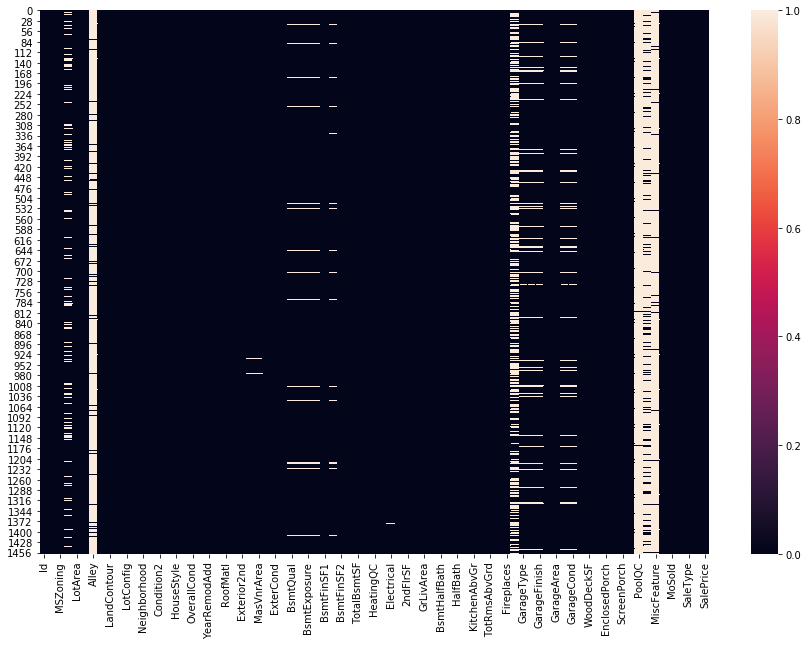

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.isnull())

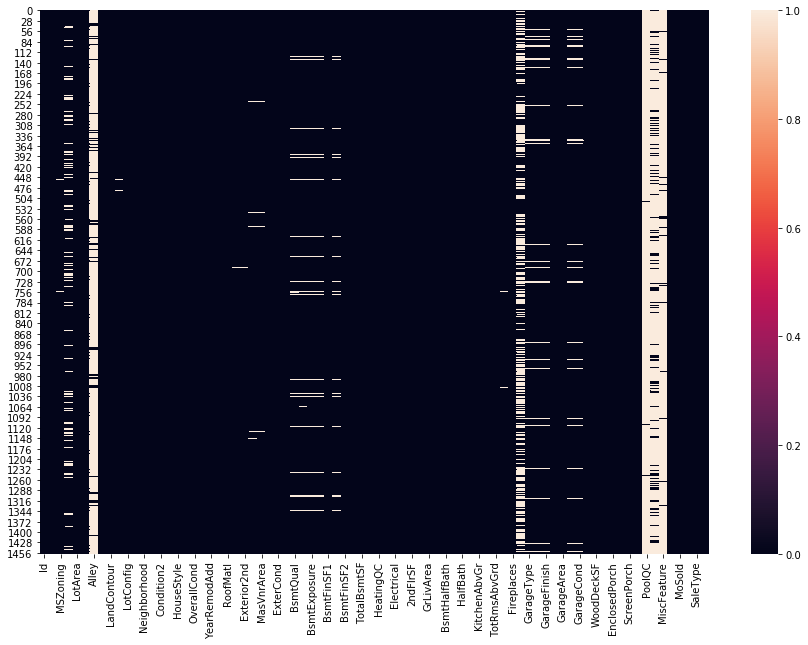

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(test_data.isnull())

There are some columns where we obviously miss too much data to work with it.
Calculating the percentage of missing values:

In [44]:
percentage_missing = round(train_data.isnull().sum() / len(train_data) * 100,2).sort_values(ascending=False)

# to see the whole list
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(percentage_missing)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [45]:
percentage_missing = round(test_data.isnull().sum() / len(test_data) * 100,2).sort_values(ascending=False)

# to see the whole list
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(percentage_missing)

PoolQC           99.79
MiscFeature      96.50
Alley            92.67
Fence            80.12
FireplaceQu      50.03
LotFrontage      15.56
GarageCond        5.35
GarageQual        5.35
GarageYrBlt       5.35
GarageFinish      5.35
GarageType        5.21
BsmtCond          3.08
BsmtQual          3.02
BsmtExposure      3.02
BsmtFinType1      2.88
BsmtFinType2      2.88
MasVnrType        1.10
MasVnrArea        1.03
MSZoning          0.27
BsmtHalfBath      0.14
Utilities         0.14
Functional        0.14
BsmtFullBath      0.14
BsmtFinSF2        0.07
BsmtFinSF1        0.07
Exterior2nd       0.07
BsmtUnfSF         0.07
TotalBsmtSF       0.07
SaleType          0.07
Exterior1st       0.07
KitchenQual       0.07
GarageArea        0.07
GarageCars        0.07
HouseStyle        0.00
LandSlope         0.00
MSSubClass        0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
LotConfig         0.00
Neighborhood      0.00
BldgType          0.00
Condition1 

In [46]:
train_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
test_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

* Dropping out features 'PoolQC', 'MiscFeature', 'Alley', 'Fence'. 
* There are 15 more features to impute values to, but we will do that later.

**2) Analyzing correlation between features** 

To make it easier, I splitted features to continious and categorical. Also I concatenated test and train data, as this way it will be easier to process data.

In [47]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

all_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
all_data.drop('Id', axis=1, inplace=True)

numerical_data = all_data.select_dtypes(include=numerics).copy()
categorical_data = all_data.select_dtypes(exclude=numerics).copy()


# 'MSSubClass' is also categorical
categorical_data['MSSubClass'] = numerical_data['MSSubClass']
numerical_data.drop('MSSubClass', axis=1, inplace=True)

Building correlation matrix for continious features:

In [48]:
numerical_corr_matrix = numerical_data.head(1460).corr()
numerical_corr_matrix.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

As we can see, there are some highly correlated features. We will drop one feature from pairs, which have correlation > 0.8

In [49]:
columns = np.full((numerical_data.shape[1]), True, dtype=bool)
for i in range(numerical_corr_matrix.shape[0]):
    for j in range(i+1, numerical_corr_matrix.shape[0]):
        if numerical_corr_matrix.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
numerical_data = numerical_data[numerical_data.columns[columns]]

numerical_data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,0,0,0,0,6,2006,NaN
2915,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,24,0,0,0,0,0,4,2006,NaN
2916,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,474,0,0,0,0,0,0,9,2006,NaN
2917,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,80,32,0,0,0,0,700,7,2006,NaN


Wee see that features 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars' and 'GarageArea' have the highest correlation with 'SalePrice'. After exlploring data description that also becomes obvious and logical.

As a next step we will analyze correlation between each of categorical feature and 'SalePrice' using correlation ratio called 'Eta', which is is defined as the weighted variance of the mean of each category divided by the variance of all samples.


In [50]:
# calculate for two features
def correlation_ratio(ctg, cont):
    fcat = pd.factorize(ctg)[0]
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = cont[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(cont,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta


# create matrix
def corr_categorical(df, target):
    values = []
    for feature in df.columns:
        values.append(correlation_ratio(df[feature], target))
    return pd.DataFrame(values, index=df.columns, columns=['Corr'])




# apply on our data
corr_c = corr_categorical(categorical_data.head(1460), numerical_data.head(1460)['SalePrice'])
corr_c.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,Corr
MSZoning,0.327963
Street,0.041036
LotShape,0.276362
LandContour,0.160605
Utilities,0.014314
LotConfig,0.144981
LandSlope,0.051784
Neighborhood,0.738630
Condition1,0.180640
Condition2,0.099495


As we see, the most correlated features are 'Neighborhood', 'ExterQual', 'KitchenQual' and 'BsmtQual'. 

**As a next step we have to explore distributions, relation between features, and detect outliers**

After exploring plots, I noticed that 'LotArea', 'GrLivArea', 'TotalBsmtSF' and 'SalePrice' have some  abnormally high values. Dropping them out.

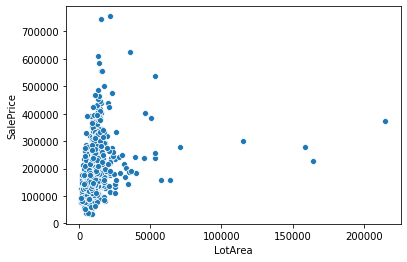

In [51]:
# abnormal values for 'LotArea' - >100000
sns.scatterplot(x=numerical_data.head(1460)['LotArea'], y=numerical_data.head(1460)['SalePrice'])

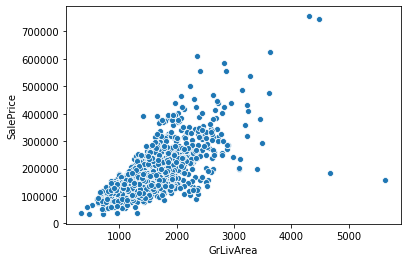

In [52]:
# abnormal values for 'GrLivArea' - >4000
sns.scatterplot(x=numerical_data.head(1460)['GrLivArea'], y=numerical_data.head(1460)['SalePrice'])

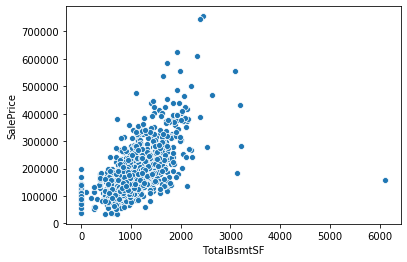

In [53]:
# abnormal values for 'TotalBsmtSF' - >4000
sns.scatterplot(x=numerical_data.head(1460)['TotalBsmtSF'], y=numerical_data.head(1460)['SalePrice'])

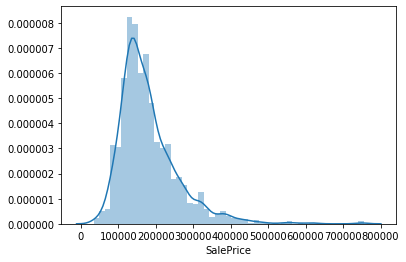

In [54]:
# abnormal values for 'SalePrice' - >650000
sns.distplot(numerical_data.head(1460)['SalePrice'])

In [55]:
#Deleting outliers:
train_set = all_data.head(1460)
train_set = train_set.drop(train_set[(train_set['LotArea'] > 100000)].index)
train_set = train_set.drop(train_set[(train_set['GrLivArea'] > 4000)].index)
train_set = train_set.drop(train_set[(train_set['TotalBsmtSF'] > 4000)].index)
train_set = train_set.drop(train_set[(train_set['SalePrice'] > 650000)].index)
test_set = all_data.tail(1459)

**As a next step we have to find out relations between features and target values. After plotting most correlated features, I found out that mostly we have linear relation.**

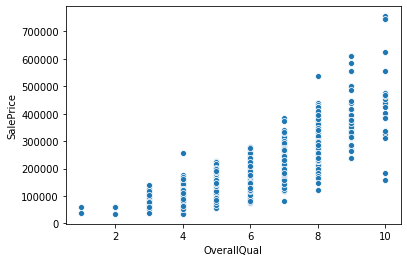

In [56]:
sns.scatterplot(x=numerical_data.head(1460)['OverallQual'],  y=numerical_data.head(1460)['SalePrice'] )

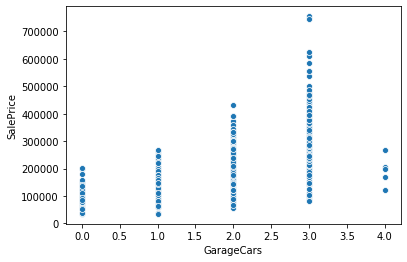

In [57]:
sns.scatterplot(x=numerical_data.head(1460)['GarageCars'],  y=numerical_data.head(1460)['SalePrice'] )

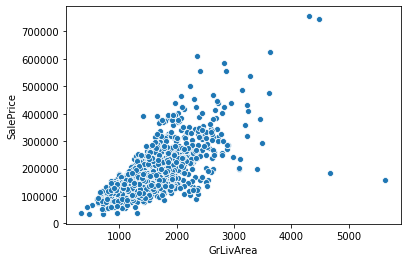

In [58]:
sns.scatterplot(x=numerical_data.head(1460)['GrLivArea'],  y=numerical_data.head(1460)['SalePrice'] )

## Step 2. Feature Selection and Engineering

After diving into data description and results of EDA, I decided to drop out some features:
- 'GarageCond' as it has the same values with 'GarageQual' in **96%** of cases.
- 'Exterior2nd' as it has the same values with 'Exterior1st' in **88%** of cases. 

- '3SsnPorch'
- 'ScreenPorch'
- 'PoolArea'
- 'MiscVal'
- 'MoSold'
- These features have low correlation.

- 'Utilities' as it has the same value for **all except one** samples, so it doesn't give useful information.

In [59]:
test_set_selected = test_set.drop(['GarageCond', 'Exterior2nd', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Utilities','FireplaceQu', 'LotFrontage','BsmtFinType2'], axis=1)
train_set_selected = train_set.drop(['GarageCond', 'Exterior2nd', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Utilities','FireplaceQu', 'LotFrontage', 'BsmtFinType2'], axis=1)


**Feature engineering**

'FullBathNum' - sum of 'BsmtFullBath' and 'FullBath'.

'HalfBathNum' - sum of 'BsmtHalfBath' and 'HalfBath'.

In [60]:
test_set_selected['FullBathNum'] = test_set['FullBath'] + test_set['BsmtFullBath']
test_set_selected['HalfBathNum'] = test_set['HalfBath'] + test_set['BsmtHalfBath']
train_set_selected['FullBathNum'] = train_set['FullBath'] + train_set['BsmtFullBath']
train_set_selected['HalfBathNum'] = train_set['HalfBath'] + train_set['BsmtHalfBath']

In [61]:
train_set_selected.drop(['HalfBath', 'BsmtHalfBath', 'FullBath','BsmtFullBath'], axis=1, inplace=True)
test_set_selected.drop(['HalfBath', 'BsmtHalfBath', 'FullBath','BsmtFullBath'], axis=1, inplace=True)

**Imputing missing values**

We have to impute next values
- 'GarageFinish', 'GarageQual', 'GarageType' with **'None'** as they are null only when GarageArea==0 (mo garage at all).
- 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual' with **None** as they are null only when there is no basement.

- 'MasVnrArea' with **0**, as it is the most frequent value for this feature
- 'MasVnrType' with **None**, as MasVnrArea==0
- 'HalfBathNum', 'FullBathNum' with 0, as there is no bathrooms
- 'GarageCars', 'GarageArea', 'GarageYrBlt' as there is no garage
- 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF' also with 0

In [62]:
columns_to_impute = ['MSZoning','Exterior1st', 'SaleType', 'KitchenQual', 'Electrical','Functional']
for column in columns_to_impute:
    test_set_selected[column].fillna(test_set_selected[column].mode()[0], inplace=True)
    train_set_selected[column].fillna(train_set_selected[column].mode()[0], inplace=True)

columns_to_impute = ['GarageFinish', 'GarageQual', 'GarageType', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
for column in columns_to_impute:
    test_set_selected[column].fillna('None', inplace=True)
    train_set_selected[column].fillna('None', inplace=True)

test_set_selected['MasVnrArea'].fillna(0, inplace=True)
train_set_selected['MasVnrArea'].fillna(0, inplace=True)

test_set_selected['MasVnrType'].fillna('None', inplace=True)
train_set_selected['MasVnrType'].fillna('None', inplace=True)

columns_to_impute = ['HalfBathNum', 'FullBathNum', 'GarageCars', 'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'GarageYrBlt']
for column in columns_to_impute:
    test_set_selected[column].fillna(0, inplace=True)
    train_set_selected[column].fillna(0, inplace=True)

In [63]:
percent_missing = round(train_set_selected.isnull().sum() / len(train_set_selected) * 100,2).sort_values(ascending=False)
print("Missing values in train set: \n" + str(percent_missing))


percent_missing = round(test_set_selected.isnull().sum() / len(test_set_selected) * 100,2).sort_values(ascending=False)
print("\n\nMissing values in test set: \n" + str(percent_missing))

Missing values in train set: 
HalfBathNum     0.0
YearBuilt       0.0
BsmtFinType1    0.0
BsmtExposure    0.0
BsmtCond        0.0
               ... 
Electrical      0.0
CentralAir      0.0
HeatingQC       0.0
Heating         0.0
MSSubClass      0.0
Length: 63, dtype: float64


Missing values in test set: 
SalePrice       100.0
HalfBathNum       0.0
YearBuilt         0.0
BsmtFinType1      0.0
BsmtExposure      0.0
                ...  
Electrical        0.0
CentralAir        0.0
HeatingQC         0.0
Heating           0.0
MSSubClass        0.0
Length: 63, dtype: float64


## Building and training model

**Choosing metric**

As we are working with regression, we will choose between some most common ones used for linear regressions: 
- MAE
- MSE
- RMSE

MSE and RMSE are much more preferable, as it is «punishing» the most deviated values - that’s what we need. 
I decided to choose RMSE between those two, because it gives us the result of cost function in the same units as provided in training set. This gives a better perception of how good (or bad) the result is.
So, **RMSE** metric is chosen.

**Choosing model**

As simple linear model relies on feature independance from each other, which we can't guarantee, that is not what we need. 
To avoid high variance values and overfitting we will use **Ridge Regression** with **cross-validation** , which has l2-regularization in its loss function.

**Creating dummy variables**

In [64]:
y_train = train_set_selected['SalePrice']
X_train = train_set_selected.copy()
X_test = test_set_selected.copy()
All_X = pd.concat([X_train, X_test], axis=0)

columns_cont = All_X.select_dtypes(include=numerics).drop('SalePrice', axis=1).columns
columns_dum = All_X.select_dtypes(exclude=numerics).columns 
for f in columns_dum:
    r = pd.get_dummies(All_X[f], drop_first=True)
    All_X = pd.concat([All_X, r], axis=1)
    All_X.drop(f, axis=1, inplace=True)
    
    
X_test = All_X[pd.isna(All_X['SalePrice'])].drop('SalePrice', axis=1)
X_train = All_X.drop(All_X[pd.isna(All_X['SalePrice'])].index).drop('SalePrice', axis=1)

**Scaling values**

Between choosing from Normalization and Standardization, I decided to use Standardization, because not all of features may have normal distribution, which is important for normalization.

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# we have to standartise only continious variables, not dummy variables.

X_train[columns_cont] = scaler.fit_transform(X_train[columns_cont])
X_test[columns_cont] = scaler.transform(X_test[columns_cont])

**Training the model**

In [66]:
from sklearn.linear_model import RidgeCV

In [67]:
# after some experiments this value turned out to be the best
ridge_model = RidgeCV(alphas=[2])

In [68]:
ridge_model.fit(X_train, y_train)

RidgeCV(alphas=array([2]), cv=None, fit_intercept=True, gcv_mode=None,
        normalize=False, scoring=None, store_cv_values=False)

In [69]:
ridge_predictions = ridge_model.predict(X_test)

In [70]:
res = pd.DataFrame()
res['Id'] = test_data['Id']
res['SalePrice'] = ridge_predictions
res.to_csv('prediction.csv', index=False)

**Spliting train set and evaluating performance**

In [71]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
def make_eval(data, y):
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=122)
    model = RidgeCV(alphas=[2])
    model.fit(X_train, y_train)
    print(model.alpha_)
    pred = model.predict(X_test)
    plt.scatter(y_test, pred)
    print("rmse: " + str(np.sqrt(metrics.mean_squared_error(y_test, pred))))
    print("rme: " + str((metrics.mean_squared_error(y_test, pred))))
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    print("mape: " + str(mape))
  

2
rmse: 20872.22024250112
rme: 435649577.85147345
mape: 8.636211952270651


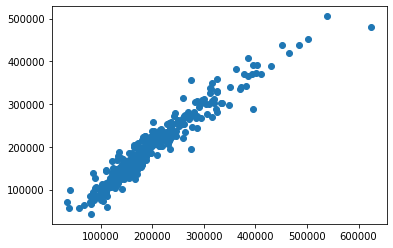

In [72]:
make_eval(X_train, y_train)